In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from jupyterthemes import jtplot
# oceans16 | grade3 | chesterish | onedork | monokai | solarizedl
jtplot.style('solarized-light')

In [2]:
dz=pd.read_excel('data/20170616_wind_farms_with_ws_2k_5k_v2_sgouris.xlsx')
df=dz.set_index(['OFFSHORE'],drop=False).drop(['STATUS','COMM','diff_exact_2k','diff_2k_5k'],axis=1)

In [3]:
df['wind']=[df['value_exact'].values[i] if df['ACCUR_LOC'].values[i]=='yes' \
 else np.mean([df['value_exact'].values[i],df['value_max_2k'].values[i],df['value_max_5k'].values[i]]) \
 for i in range(len(df['ACCUR_LOC']))]

In [4]:
wd=df.drop(['value_exact','value_max_2k','value_max_5k','ACCUR_LOC','ID'],axis=1)

In [25]:
for i in wd.head(10).T.iteritems():
    if i[1][5]=='#ND':
        print i[1][4]+' wind farm, '+i[1][1]+', '+i[1][0]

Kriti wind farm, Voskero, GR
Castilla y León wind farm, Villoruebo, ES
Sicily wind farm, Enna, IT
Castilla-La Mancha wind farm, Somolinos, ES
Galicia wind farm, MasgalÃ¡n-Campo Do Coco, ES
Castilla y León wind farm, El Toranzo, ES


Probabilistically back-assign?

In [31]:
wd['power']=wd['POWER_KW'].astype(float,errors='ignore').replace(0,np.nan).replace('#ND',np.nan)/1000.0

In [32]:
wd['year']=wd['Year'].replace('#ND',np.nan).astype(float)

In [33]:
wd['weighted']=wd['wind']*wd['power']/wd['power'].mean()

In [34]:
wd=wd.drop(['POWER_KW','Year'],axis=1)
wd['powerlog']=np.log10(wd['power'])
wd['windlog']=np.log10(wd['wind'])

In [35]:
wd.head()

,ISO_CODE,OFFSHORE,Sub-national,wind,power,year,weighted,powerlog,windlog
OFFSHORE,,,,,,,,,
no,GR,no,Kriti,7.659713,5.950,NaN,1.888133,0.774517,0.884213
no,FR,no,Basse-Terre,9.024910,1.925,2006.0,0.719742,0.284431,0.955443
no,ES,no,Castilla y León,7.565920,16.150,NaN,5.062178,1.208173,0.878862
no,CN,no,Hebei,10.017850,0.850,2007.0,0.352774,-0.070581,1.000775
no,CN,no,Guangdong,6.852443,22.000,2008.0,6.245559,1.342423,0.835845


(array([  69.8  ,  121.1  ,  218.35 ,  279.835,  197.27 ,  283.08 ,
         221.335,   15.9  ,   21.91 ,    3.41 ]),
 array([ 4.68905667,  5.149173  ,  5.60928933,  6.06940567,  6.529522  ,
         6.98963833,  7.44975467,  7.909871  ,  8.36998733,  8.83010367,
         9.29022   ]),
 <a list of 10 Patch objects>)

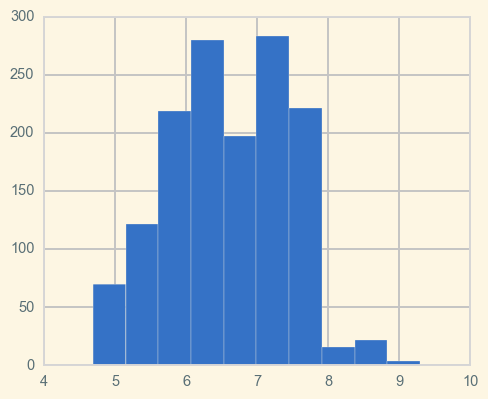

In [36]:
x=wd.loc['no'].set_index('ISO_CODE').loc['GR']['wind'].values
w=wd.loc['no'].set_index('ISO_CODE').loc['GR']['power'].values
plt.hist(x,weights=w)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000125B4080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010848B70>]], dtype=object)

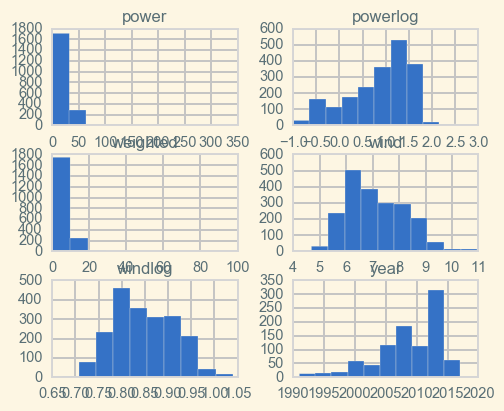

In [37]:
wd.loc['no'].set_index('ISO_CODE').loc[['GR','GB','ES']].hist()

In [44]:
df=wd.loc['no'].set_index(['ISO_CODE','year'])

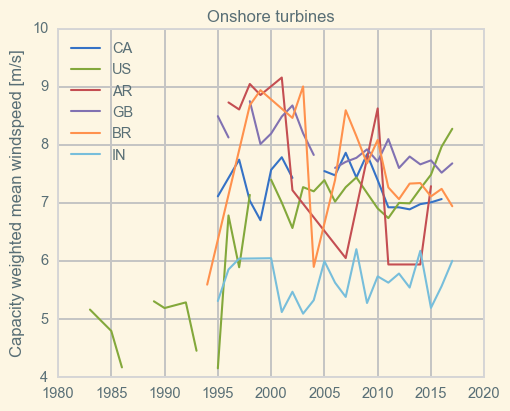

In [48]:
cs={'BR','AR','GB','CA','US','IN'}
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

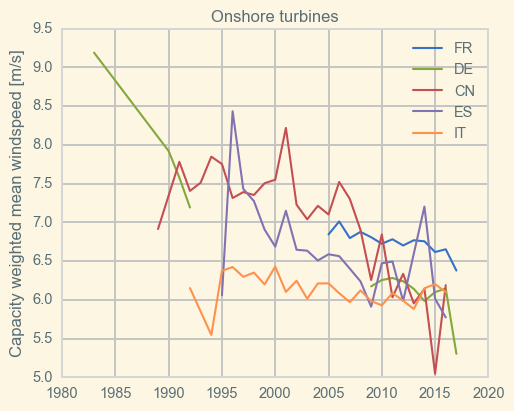

In [49]:
cs={'FR','DE','CN','IT','ES'}
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

In [50]:
wd

,ISO_CODE,OFFSHORE,Sub-national,wind,power,year,weighted,powerlog,windlog
OFFSHORE,,,,,,,,,
no,GR,no,Kriti,7.659713,5.950,NaN,1.888133,0.774517,0.884213
no,FR,no,Basse-Terre,9.024910,1.925,2006.0,0.719742,0.284431,0.955443
no,ES,no,Castilla y León,7.565920,16.150,NaN,5.062178,1.208173,0.878862
no,CN,no,Hebei,10.017850,0.850,2007.0,0.352774,-0.070581,1.000775
no,CN,no,Guangdong,6.852443,22.000,2008.0,6.245559,1.342423,0.835845
no,IT,no,Sicily,6.966937,30.000,NaN,8.658971,1.477121,0.843042
no,ES,no,Castilla-La Mancha,6.686440,10.560,NaN,2.925244,1.023664,0.825195
no,ES,no,Galicia,6.769370,49.500,NaN,13.882147,1.694605,0.830548
no,ES,no,Castilla y León,7.960730,19.800,NaN,6.530121,1.296665,0.900953


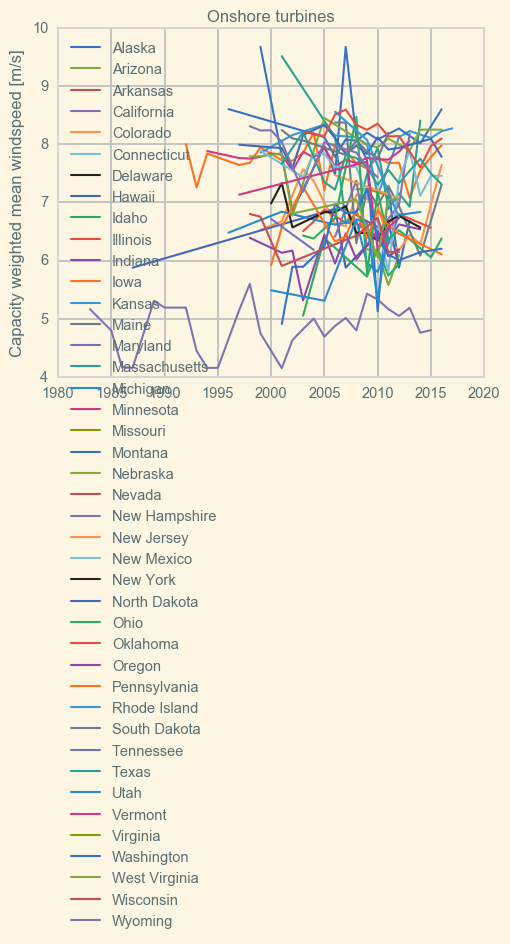

In [65]:
df=wd.loc['no'].set_index('ISO_CODE').loc['US'].set_index(['Sub-national','year'])
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

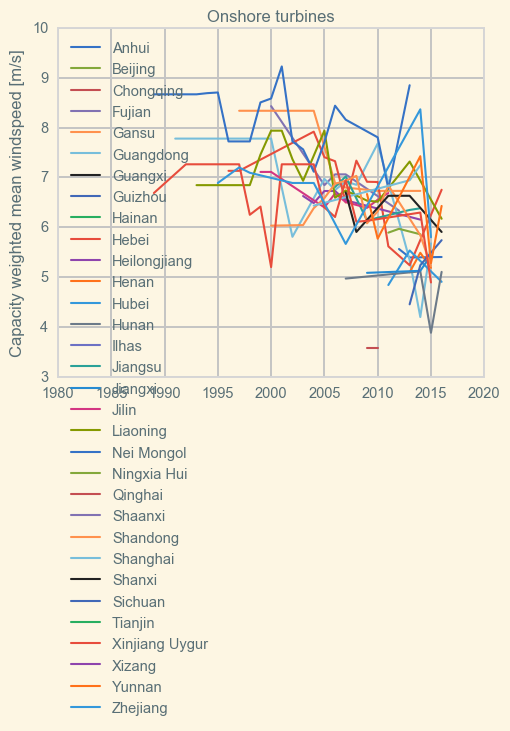

In [69]:
df=wd.loc['no'].set_index('ISO_CODE').loc['CN'].set_index(['Sub-national','year'])
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

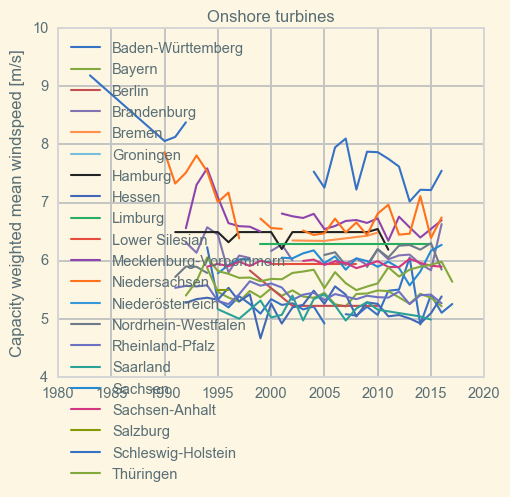

In [70]:
df=wd.loc['no'].set_index('ISO_CODE').loc['DE'].set_index(['Sub-national','year'])
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

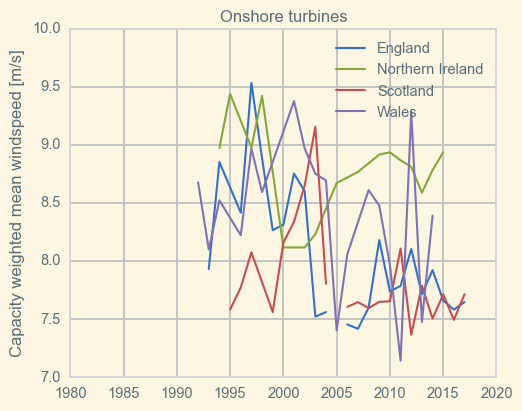

In [71]:
df=wd.loc['no'].set_index('ISO_CODE').loc['GB'].set_index(['Sub-national','year'])
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

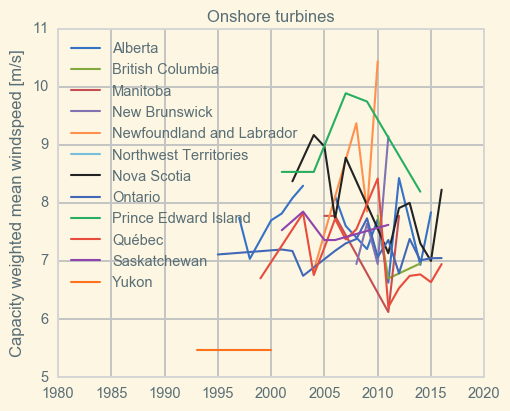

In [72]:
df=wd.loc['no'].set_index('ISO_CODE').loc['CA'].set_index(['Sub-national','year'])
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

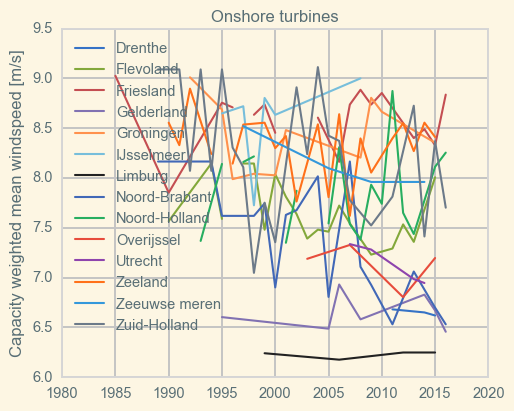

In [73]:
df=wd.loc['no'].set_index('ISO_CODE').loc['NL'].set_index(['Sub-national','year'])
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

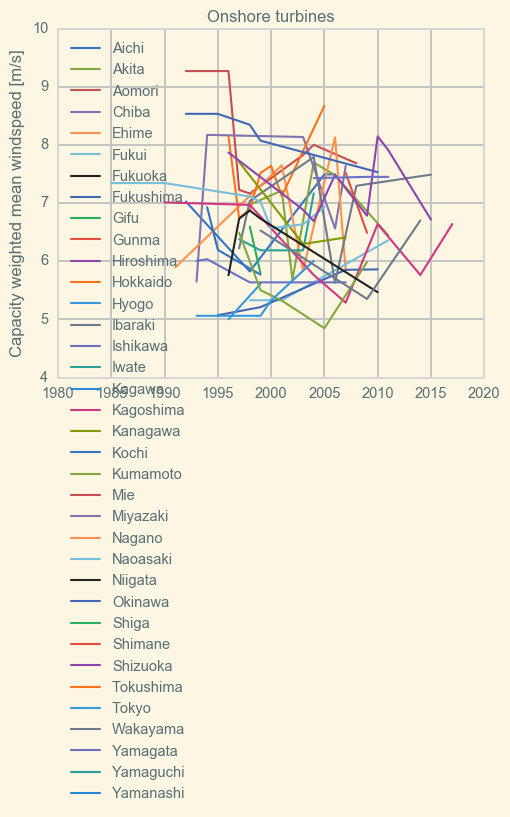

In [74]:
df=wd.loc['no'].set_index('ISO_CODE').loc['JP'].set_index(['Sub-national','year'])
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

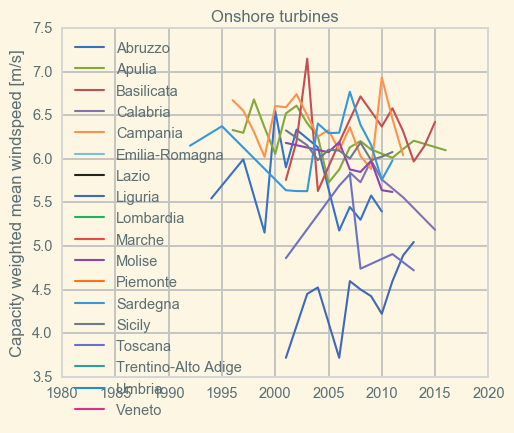

In [75]:
df=wd.loc['no'].set_index('ISO_CODE').loc['IT'].set_index(['Sub-national','year'])
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

with interpolation

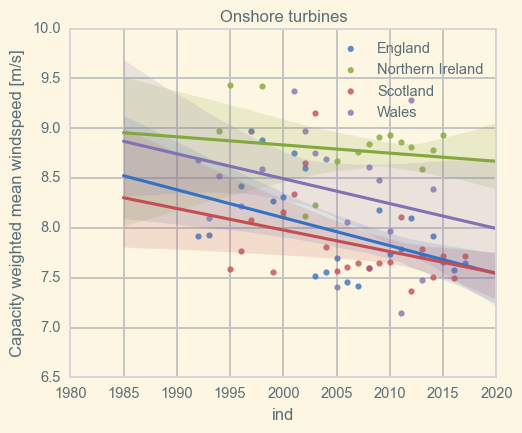

In [166]:
df=wd.loc['no'].set_index('ISO_CODE').loc['GB'].set_index(['Sub-national','year']).dropna()
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    g=pd.DataFrame(z[:-1],x[:-1])#.set_index(pd.to_datetime(np.array(x[:-1]).astype(int).astype(str),format='%Y')).resample('5A').mean()
    g['ind']=g.index
    g.columns=['z','ind']
    #x=[e.year for e in g.index]
    #z=g[0].values
    #plt.plot(x,z,label=c)
    sns.regplot(x='ind', y='z', data=g,label=c);
    
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

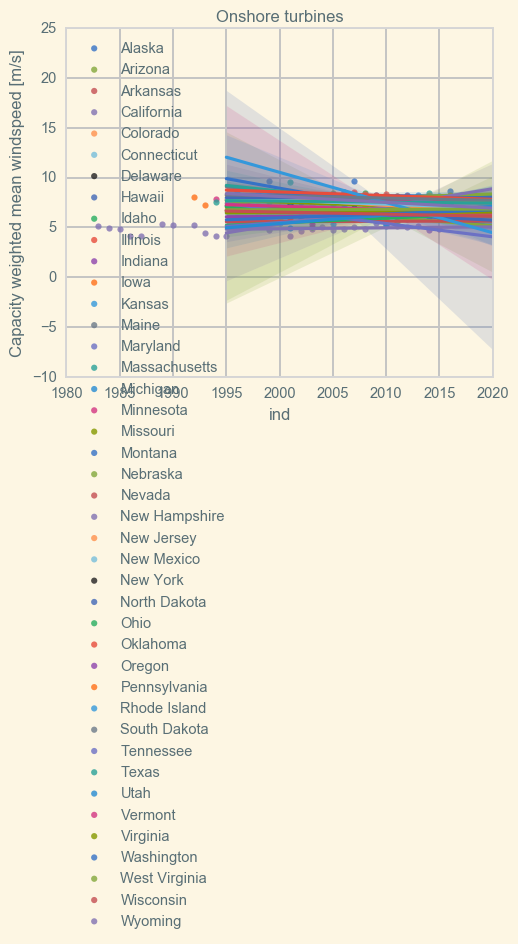

In [168]:
df=wd.loc['no'].set_index('ISO_CODE').loc['US'].set_index(['Sub-national','year']).dropna()
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    g=pd.DataFrame(z,x)#.set_index(pd.to_datetime(np.array(x[:-1]).astype(int).astype(str),format='%Y')).resample('5A').mean()
    g['ind']=g.index
    g.columns=['z','ind']
    #x=[e.year for e in g.index]
    #z=g[0].values
    #plt.plot(x,z,label=c)
    sns.regplot(x='ind', y='z', data=g,label=c);
    
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

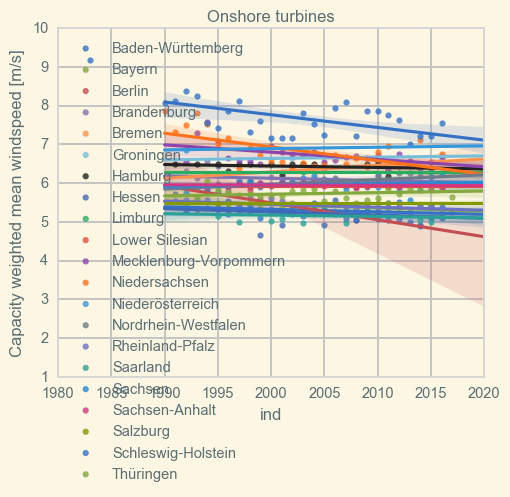

In [170]:
df=wd.loc['no'].set_index('ISO_CODE').loc['DE'].set_index(['Sub-national','year']).dropna()
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    g=pd.DataFrame(z,x)#.set_index(pd.to_datetime(np.array(x[:-1]).astype(int).astype(str),format='%Y')).resample('5A').mean()
    g['ind']=g.index
    g.columns=['z','ind']
    #x=[e.year for e in g.index]
    #z=g[0].values
    #plt.plot(x,z,label=c)
    sns.regplot(x='ind', y='z', data=g,label=c);
    
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

offshore

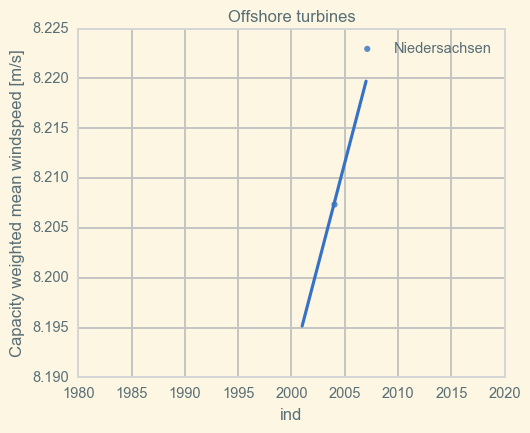

In [182]:
df=wd.loc['yes'].set_index('ISO_CODE').loc['DE'].set_index(['Sub-national','year']).dropna()
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    g=pd.DataFrame(z,x)#.set_index(pd.to_datetime(np.array(x[:-1]).astype(int).astype(str),format='%Y')).resample('5A').mean()
    g['ind']=g.index
    g.columns=['z','ind']
    #x=[e.year for e in g.index]
    #z=g[0].values
    #plt.plot(x,z,label=c)
    sns.regplot(x='ind', y='z', data=g,label=c);
    
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Offshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

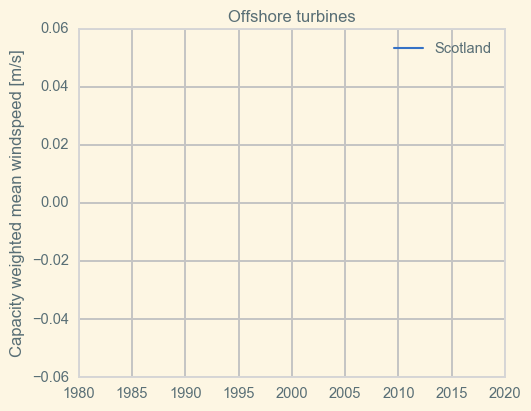

In [187]:
df=wd.loc['yes'].set_index('ISO_CODE').loc['GB'].set_index(['Sub-national','year'])
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Offshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

In [189]:
df

OFFSHORE      wind     power     weighted  powerlog  \
Sub-national year                                                         
NaN          NaN         yes  8.990630  1000.000   372.471715  3.000000   
             NaN         yes  9.242210   408.000   156.220912  2.610660   
             NaN         yes  9.956060       NaN          NaN       NaN   
             NaN         yes  9.674170   500.000   200.395005  2.698970   
             NaN         yes  9.674170  1500.000   601.185015  3.176091   
             NaN         yes  6.413520   400.000   106.281975  2.602060   
             NaN         yes  9.674170    12.000     4.809480  1.079181   
             NaN         yes  8.854440       NaN          NaN       NaN   
             NaN         yes  7.346613     3.000     0.913086  0.477121   
             NaN         yes  7.927200     6.000     1.970490  0.778151   
             NaN         yes  7.344443   150.000    45.640807  2.176091   
             NaN         yes  7.334937   150.000    45.581730  2.176091   
Ohio         NaN         yes  8.308860    20.700     7.125494  1.315970   
NaN          NaN         yes  8.284460  1950.000   669.270973  3.290035   
             NaN         yes  7.894017   750.000   245.280191  2.875061   
             NaN         yes  7.176537   408.000   121.304872  2.610660   
             NaN         yes  8.300057  2230.000   766.812341  3.348305   
             NaN         yes  9.202573    90.000    34.312706  1.954243   
             NaN         yes  9.210040  1500.000   572.342437  3.176091   
             NaN         yes  8.407850    24.000     8.359867  1.380211   
             NaN         yes  8.006387   450.000   149.263028  2.653213   
             2016.0      yes  9.477593    30.000    11.779382  1.477121   
             NaN         yes  7.253273    36.000    10.817819  1.556303   
             NaN         yes  9.364850   468.000   181.572407  2.670246   
             NaN         yes  9.165303    12.000     4.556499  1.079181   
             NaN         yes  9.136637   480.000   181.689891  2.681241   
             NaN         yes  9.121250  4508.000  1703.497261  3.653984   
Florida      NaN         yes  5.102417    25.000     5.284685  1.397940   
             2015.0      yes  5.102417     0.125     0.026423 -0.903090   
Delaware     NaN         yes  7.290727     5.000     1.510233  0.698970   
California   NaN         yes  6.562173       NaN          NaN       NaN   
             NaN         yes  6.562173       NaN          NaN       NaN   

                      windlog  
Sub-national year              
NaN          NaN     0.953790  
             NaN     0.965776  
             NaN     0.998088  
             NaN     0.985614  
             NaN     0.985614  
             NaN     0.807096  
             NaN     0.985614  
             NaN     0.947161  
             NaN     0.866087  
             NaN     0.899120  
             NaN     0.865959  
             NaN     0.865396  
Ohio         NaN     0.919541  
NaN          NaN     0.918264  
             NaN     0.897298  
             NaN     0.855915  
             NaN     0.919081  
             NaN     0.963909  
             NaN     0.964262  
             NaN     0.924685  
             NaN     0.903437  
             2016.0  0.976698  
             NaN     0.860534  
             NaN     0.971501  
             NaN     0.962147  
             NaN     0.960786  
             NaN     0.960054  
Florida      NaN     0.707776  
             2015.0  0.707776  
Delaware     NaN     0.862771  
California   NaN     0.817048  
             NaN     0.817048

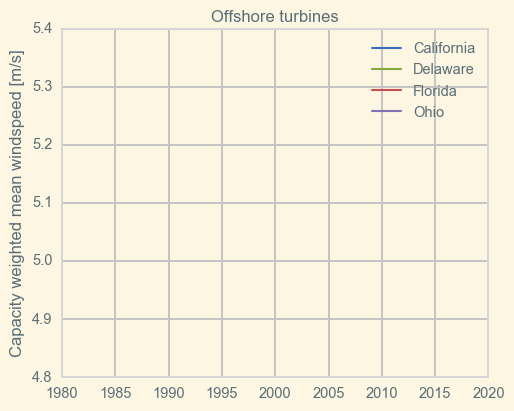

In [188]:
df=wd.loc['yes'].set_index('ISO_CODE').loc['US'].set_index(['Sub-national','year'])
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Offshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

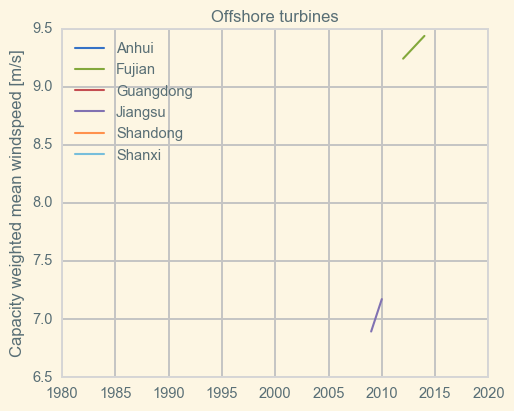

In [190]:
df=wd.loc['yes'].set_index('ISO_CODE').loc['CN'].set_index(['Sub-national','year'])
cs=df.index.levels[0].unique()
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        try:
            if len(df.loc[c].loc[i]['power'])>1:
                z.append(np.average(df.loc[c].loc[i]['wind'],weights=df.loc[c].loc[i]['power'].astype(float).values))
        except:
            z.append(np.average(df.loc[c].loc[i]['wind']))
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Offshore turbines")
plt.xlim(1980,2020)
plt.legend(loc=0)

# NAMES!